<div style="background-color: #F9F9F9; padding: 40px; border-radius: 20px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.1); margin: 20px auto; max-width: 800px; text-align: center;">
  <h1 style="color: #2C3E50; font-family: 'Georgia', serif; font-size: 36px; font-weight: bold; letter-spacing: 1.5px; text-transform: uppercase; margin-bottom: 10px;">
    Calories Burnt Prediction
  </h1>
  <p style="color: #5D6D7E; font-family: 'Arial', sans-serif; font-size: 18px; line-height: 1.6; margin-top: 0;">
    Predicting Calories Burnt Based On Physiological Parameters Using ML Regression Models 
  </p>
  <hr style="border: none; border-top: 2px solid #AED6F1; width: 80%; margin: 20px auto;">
  <p style="color: #85929E; font-family: 'Arial', sans-serif; font-size: 14px; margin-top: 10px;">

  </p>
  <p style="color: #85929E; font-family: 'Arial', sans-serif; font-size: 14px; margin-top: 10px;">
    By Ahmed Mohamed Hussein
  </p>
</div>


## Dataset Description

The dataset used in this project contains **physiological and activity-related features** of individuals, along with the **calories burnt** during exercise. The goal is to build a regression model that can accurately predict the number of calories burnt based on these features.

### Features Overview

| Feature        | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `Gender`       | Categorical feature indicating the gender of the individual (`Male` / `Female`) |
| `Age`          | Age of the individual in years                                              |
| `Height`       | Height in centimeters                                                       |
| `Weight`       | Weight in kilograms                                                         |
| `Duration`     | Duration of the exercise session in minutes                                 |
| `Heart_Rate`   | Average heart rate during the activity (beats per minute)                   |
| `Body_Temp`    | Average body temperature during the session (in °C)                         |
| `Calories`     | **Target variable** — number of calories burnt during the session           |

### Project Objective

Build and compare multiple machine learning regression models to predict the `Calories` variable with the highest possible accuracy and lowest error (e.g., using MSE, MAE, R²).


<div style="
  max-width: 800px;
  margin: 30px auto;
  padding: 25px 30px;
  background-color: #FFFFFF;
  border-left: 5px solid #084383ff;
  border-radius: 8px;
  box-shadow: 0 4px 12px rgba(0, 0, 0, 0.05);
  font-family: 'Segoe UI', Arial, sans-serif;
  text-align: center;
">
  <h2 style="
    color: #1F2937;
    font-size: 24px;
    font-weight: 600;
    margin: 0;
    letter-spacing: 0.8px;
  ">
    Importing Required Libraries
  </h2>
  <p style="
    color: #4B5563;
    font-size: 15px;
    margin: 10px 0 0;
  ">
    Loading essential Python libraries for data analysis 
  </p>
</div>

In [196]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math as math 
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

colors = ["#b1e7cd", "#854442", "#580F0F", "#fff4e6", "#3c2f2f",
         "#be9b7b", "#512E5F", "#1E574B", "#AAB7B8", "#20B2AA",
         "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<div style="
  max-width: 800px;
  margin: 30px auto;
  padding: 25px 30px;
  background-color: #FFFFFF;
  border-left: 5px solid #0b4a8dff;
  border-radius: 8px;
  box-shadow: 0 4px 12px rgba(0, 0, 0, 0.05);
  font-family: 'Segoe UI', Arial, sans-serif;
  text-align: center;
">
  <h2 style="
    color: #1F2937;
    font-size: 24px;
    font-weight: 600;
    margin: 0;
    letter-spacing: 0.8px;
  ">
   Read Data and Get Some Info About It
  </h2>
  <p style="
    color: #4B5563;
    font-size: 15px;
    margin: 10px 0 0;
  ">
  </p>
</div>

In [197]:
d1 = pd.read_csv(r"D:\Ahmed\Projects\Calories Burnt Prediction\Data\calories.csv")
d1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [198]:
d2 = pd.read_csv(r"D:\Ahmed\Projects\Calories Burnt Prediction\Data\exercise.csv")
d2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [199]:
data = pd.merge(d2, d1, on='User_ID')
data.to_csv(r'D:\Ahmed\Projects\Calories Burnt Prediction\Data\data.csv', index=False)


In [200]:
data.drop('User_ID' , axis=1 , inplace=True)
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [201]:
print("Number Of Rows In DataSet :",data.shape[0])
print("Number Of Cloumns In DataSet :",data.shape[1])

Number Of Rows In DataSet : 15000
Number Of Cloumns In DataSet : 8


In [202]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


In [203]:
data.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [205]:

pd.DataFrame({'Count':data.shape[0],
            'Null':data.isnull().sum(),
            'Null %':data.isnull().mean() * 100,
            'Cardinality':data.nunique()
})

,Count,Null,Null %,Cardinality
Gender,15000,0,0.0,2
Age,15000,0,0.0,60
Height,15000,0,0.0,90
Weight,15000,0,0.0,91
Duration,15000,0,0.0,30
Heart_Rate,15000,0,0.0,59
Body_Temp,15000,0,0.0,45
Calories,15000,0,0.0,277


<div style="
  max-width: 800px;
  margin: 30px auto;
  padding: 25px 30px;
  background-color: #FFFFFF;
  border-left: 5px solid #0b4a8dff;
  border-radius: 8px;
  box-shadow: 0 4px 12px rgba(0, 0, 0, 0.05);
  font-family: 'Segoe UI', Arial, sans-serif;
  text-align: center;
">
  <h2 style="
    color: #1F2937;
    font-size: 24px;
    font-weight: 600;
    margin: 0;
    letter-spacing: 0.8px;
  ">
   Data Visualizaion 
  </h2>
  <p style="
    color: #4B5563;
    font-size: 15px;
    margin: 10px 0 0;
  ">
  </p>
</div>

<Figure size 1500x700 with 0 Axes>

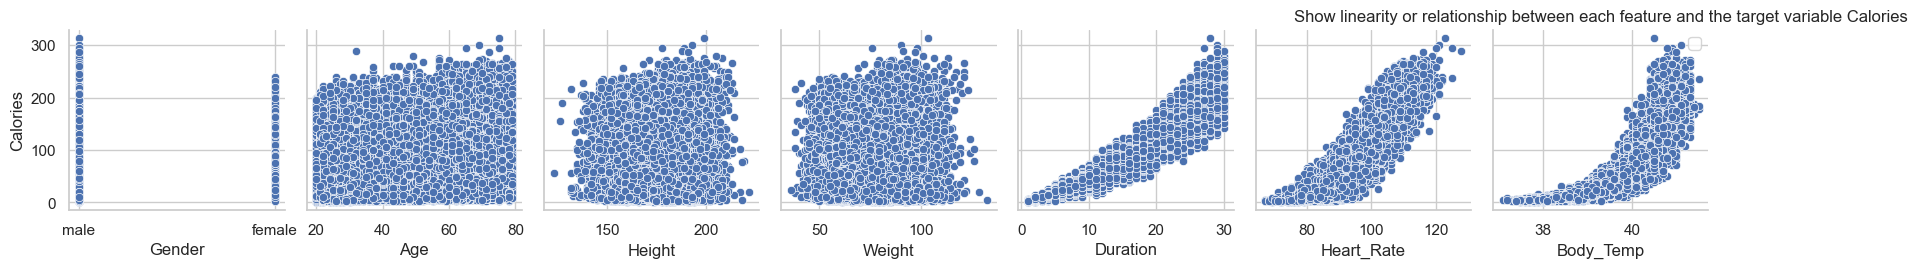

In [206]:
plt.figure(figsize=(15, 7))
sns.pairplot(data=data, y_vars=["Calories"], x_vars=[col for col in data.columns if col != "Calories"])
plt.title("Show linearity or relationship between each feature and the target variable Calories")
plt.legend()
plt.show()

### Feature vs Target Relationship

A pairplot was used to explore the relationship between each feature and the target column `Calories`.

**Linear relationships with the target:**
- `Duration`
- `Heart_Rate`
- `Body_Temp`

**Non-linear or weak relationships:**
- `Age`
- `Height`
- `Weight`
- `Gender`

This helps in choosing suitable models. Linear models may work well with the first group of features, while non-linear models might perform better for the rest.


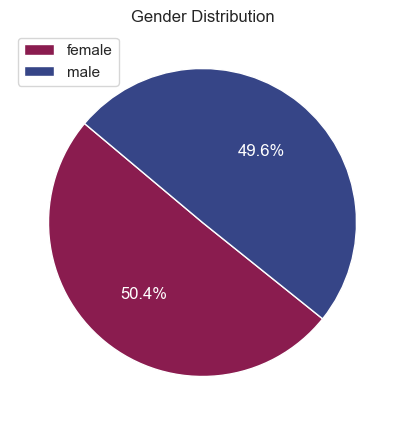

In [207]:
genders = data['Gender'].value_counts().reset_index()

plt.figure(figsize=(10,5))
plt.pie(genders['count'], labels=genders['Gender'] ,
      autopct='%2.1f%%' ,
      startangle=140 ,
      colors=["#8A1C4F", "#364587"]
      ,textprops={'color': 'white', 'fontsize': 12}
      )
plt.title("Gender Distribution")
plt.legend()
plt.show()

 `Gender Distribution`

The dataset demonstrates a balanced representation of genders among the individuals recorded:

- **Male** participants: 49.6%
- **Female** participants: 50.4%

This balanced distribution ensures that the model does not inherit gender-related bias during training and contributes to fair and generalizable predictions.


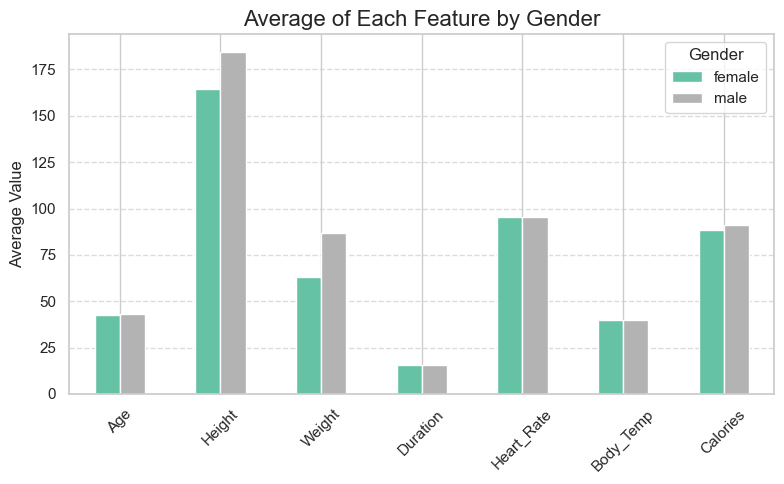

In [208]:
gende_mean = data.groupby("Gender").mean().round(2)
gende_mean.T.plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title('Average of Each Feature by Gender', fontsize=16)
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [209]:
gende_mean['Calories']

Gender
female    88.15
male      90.95
Name: Calories, dtype: float64

`Average of Each Feature by Gender`
- Males have higher average height, weight, and calories burnt.

- Heart rate and body temperature are relatively similar across genders.

- Exercise duration is nearly equal between both genders.

- **Females** burn approximately 88.15 calories

- **Males** burn approximately 90.95 calories

 



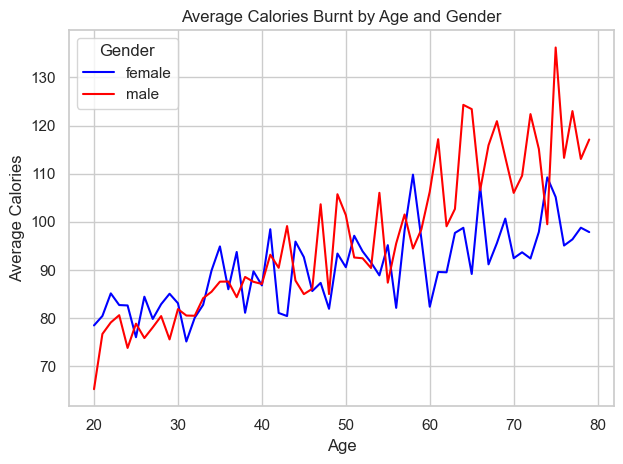

In [210]:
avg_age_calories=data.groupby(['Age' , 'Gender'])['Calories'].mean().reset_index()

custom_palette = {'male': 'red', 'female': 'blue'}

sns.lineplot(x=avg_age_calories['Age'] ,
            y=avg_age_calories['Calories'] ,
            hue=avg_age_calories['Gender'],
            palette=custom_palette)
plt.title("Average Calories Burnt by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Average Calories")
plt.grid(True)
plt.tight_layout()
plt.show()


 **`Calories Burnt by Gender and Age`**

**Observations**
- As age increases, the average calories burnt also increases for both males and females.
- Males consistently burn more calories than females across nearly all age groups.

**Key Insights**
- There is a **positive correlation** between age and calorie expenditure in this dataset.
- The higher calorie burn in males may be attributed to **physiological factors** such as:
  - Greater average muscle mass
  - Higher basal metabolic rate (BMR)


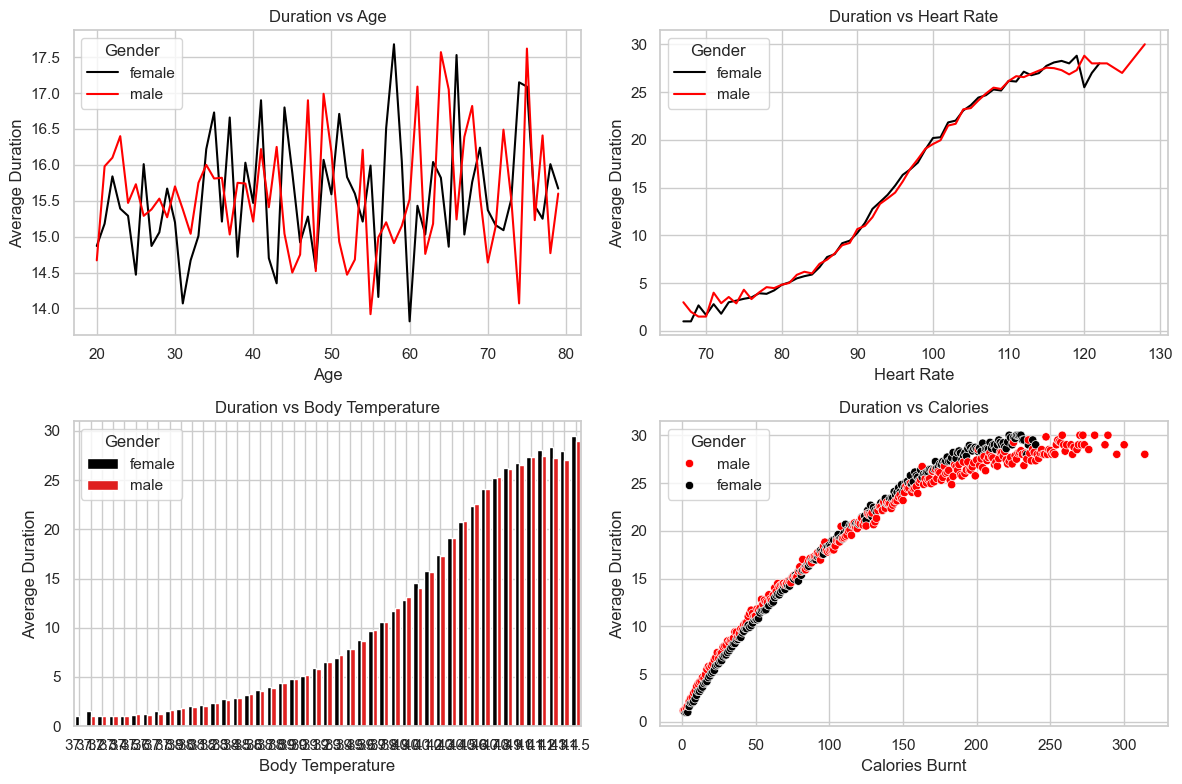

In [211]:
duration_age = data.groupby(['Age', 'Gender'])['Duration'].mean().round(2).reset_index()
duration_heart_rate = data.groupby(['Heart_Rate', 'Gender'])['Duration'].mean().round(2).reset_index()
duration_body_temp = data.groupby(['Body_Temp', 'Gender'])['Duration'].mean().round(2).reset_index()
duration_calor = data.groupby(['Calories', 'Gender'])['Duration'].mean().round(2).reset_index()

custom_palette = {'male': 'red', 'female': 'black'}

plt.figure(figsize=(12, 8))

#--- Plot 1 ----
plt.subplot(2, 2, 1)
sns.lineplot(data=duration_age, x='Age', y='Duration', hue='Gender', palette=custom_palette)
plt.title("Duration vs Age")
plt.xlabel("Age")
plt.ylabel("Average Duration")
plt.grid(True)

#--- Plot 2 ----
plt.subplot(2, 2, 2)
sns.lineplot(data=duration_heart_rate, x='Heart_Rate', y='Duration', hue='Gender', palette=custom_palette)
plt.title("Duration vs Heart Rate")
plt.xlabel("Heart Rate")
plt.ylabel("Average Duration")
plt.grid(True)

#--- Plot 3 ----
plt.subplot(2, 2, 3)
sns.barplot(data=duration_body_temp, x='Body_Temp', y='Duration', hue='Gender', palette=custom_palette)
plt.title("Duration vs Body Temperature")
plt.xlabel("Body Temperature")
plt.ylabel("Average Duration")
plt.grid(True)

#--- Plot 4 ----
plt.subplot(2, 2, 4)
sns.scatterplot(data=duration_calor, x='Calories', y='Duration', hue='Gender', palette=custom_palette)
plt.title("Duration vs Calories")
plt.xlabel("Calories Burnt")
plt.ylabel("Average Duration")
plt.grid(True)

plt.tight_layout()
plt.show()



 **`Duration vs Age`**

- **Observation:**  
  The average duration of workout shows **no significant variation across different ages** for both males and females.
- **Conclusion:**  
  There appears to be **no strong correlation** between age and workout duration.

---

 **`Duration vs Heart Rate`**

- **Observation:**  
  A **clear linear relationship** is observed — as the duration of exercise increases, heart rate also increases for both genders.
- **Conclusion:**  
  This is **expected and physiologically valid**, indicating that longer workouts lead to a higher heart rate.

---

 **`Duration vs Body Temperature`**

- **Observation:**  
  A noticeable **positive trend**: As workout duration increases, so does the body temperature, especially in a linear fashion.
- **Conclusion:**  
  This supports the **logical assumption** that prolonged exercise causes body heat to rise.

---

**`Duration vs Calories Burnt`**

- **Observation:**  
  A strong **linear relationship** exists: As workout duration increases, calories burnt also increase significantly.
- **Conclusion:**  
  This is the **most important and impactful correlation** in this analysis, confirming that longer workouts lead to more calories burnt — a very **realistic and expected outcome**.

---

**General Insight:**  
Across all plots, gender differences are relatively minor, but males tend to have slightly higher durations in some ranges. The most influential factors affecting duration are **Heart Rate**, **Body Temperature**, and **Calories Burnt**, while **Age** shows minimal impact.



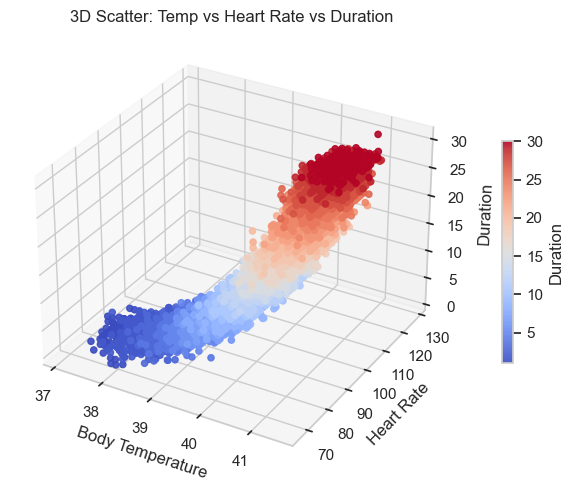

In [214]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Color by Duration
p = ax.scatter(
    data['Body_Temp'],
    data['Heart_Rate'],
    data['Duration'],
    c=data['Duration'],
    cmap='coolwarm',  # or 'plasma', 'coolwarm', etc.
    alpha=0.9,

)

ax.set_xlabel('Body Temperature')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Duration')
ax.set_title("3D Scatter: Temp vs Heart Rate vs Duration")

cbar = fig.colorbar(p, ax=ax, shrink=0.5, aspect=20)
cbar.set_label('Duration')

plt.tight_layout()
plt.show()


**`Relationship Between Body Temperature, Heart Rate, and Duration`**

To explore the interaction between **Body Temperature**, **Heart Rate**, and **Duration**, we visualized the data using a **3D scatter plot**, where:

- **X-axis** → Body Temperature  
- **Y-axis** → Heart Rate  
- **Z-axis** → Duration  


---

**`Insights & Observations`**:

- The plot shows a **strong linear relationship** between `Duration`, `Heart Rate`, and `Body Temperature`.
- As **exercise duration increases**, both **body temperature** and **heart rate** tend to increase.
- This is a **realistic and expected behavior** in physical activity:
  - Longer workouts typically lead to higher heart rate and body temperature.
- The color intensity supports this relation, reflecting how Duration varies smoothly along both axes.
- These three variables are **strongly interconnected** and can be considered **key features** in any predictive model related to workout analysis.

> This insight reinforces their importance in regression models for calorie prediction or performance tracking.


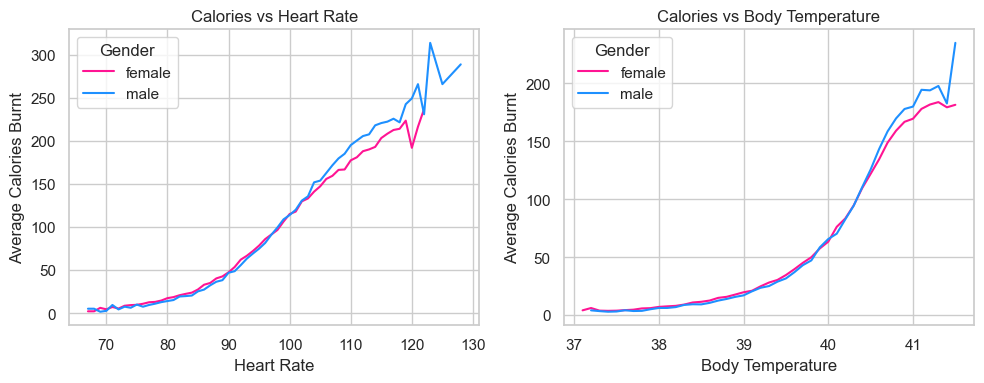

In [225]:
# Group data for plotting
duration_hr = data.groupby(['Heart_Rate',"Gender"])['Calories'].mean().reset_index()
duration_temp = data.groupby(['Body_Temp',"Gender"])['Calories'].mean().reset_index()

# Custom colors for genders
custom_palette = {'male': 'dodgerblue', 'female': 'deeppink'}

plt.figure(figsize=(10, 4))

# --- Subplot 1: Calories vs Heart Rate ---
plt.subplot(1, 2, 1)
sns.lineplot(data=duration_hr, x='Heart_Rate', y='Calories', hue='Gender', palette=custom_palette)
plt.title("Calories vs Heart Rate")
plt.xlabel("Heart Rate")
plt.ylabel("Average Calories Burnt")
plt.grid(True)

# --- Subplot 2: Calories vs Body Temperature ---
plt.subplot(1, 2, 2)
sns.lineplot(data=duration_temp, x='Body_Temp', y='Calories', hue='Gender', palette=custom_palette)
plt.title("Calories vs Body Temperature")
plt.xlabel("Body Temperature")
plt.ylabel("Average Calories Burnt")
plt.grid(True)

plt.tight_layout()
plt.show()


**`Calories vs Heart Rate & Body Temperature (by Gender)`**

We analyzed how the average **Calories burnt** varies with both **Heart Rate** and **Body Temperature**, split by **Gender**. The following observations were made:

**`Calories vs Heart Rate`**
- There is a **positive linear trend** between **heart rate** and **calories burnt**.
- As the heart rate increases, the average calories burnt also increases, which is biologically logical since higher heart rates typically indicate more intense physical activity.
- Both males and females follow the same general trend, though slight variations in calorie levels can be observed across genders.

**`Calories vs Body Temperature`**
- A similar **positive relationship** appears between **body temperature** and **calories burnt**.
- As body temperature rises (likely due to longer or more intense workouts), calories burnt also increases.
- The trend is consistent across genders, reinforcing the link between metabolic activity and energy expenditure.

These relationships support the idea that both **Heart Rate** and **Body Temperature** can serve as indirect indicators for **Calories Burnt** during exercise sessions.


<Axes: >

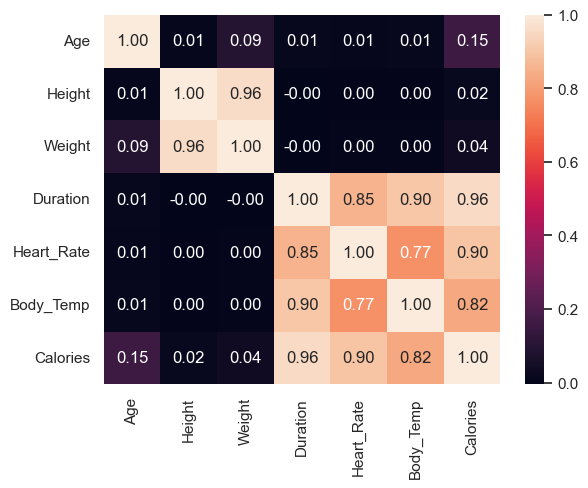

In [227]:
cor = data.corr(numeric_only=True)

sns.heatmap(cor , annot=True , fmt='.2f' , )


**`Correlation Heatmap Analysis`**

- To validate the relationships observed in previous visualizations, a **correlation heatmap** was generated using all numeric features in the dataset.  
The heatmap displays **Pearson correlation coefficients**, indicating the strength and direction of linear relationships between variables.

**`Key Observations`**

**Strong Positive Correlations**:
- `Duration`, `Heart Rate`, and `Body Temperature` show strong positive correlations with each other.
  - Confirms the interdependent, linear relationships seen in earlier plots.
- `Calories` exhibits a positive correlation with:
  - `Heart Rate`
  - `Body Temperature`
  - Consistent with subplot analyses where calorie burn increased with rising physiological metrics.

**Interpretation**:
- As physical activity duration increases, heart rate and body temperature rise, leading to higher calorie expenditure.
- These relationships are physiologically meaningful and expected in real-world scenarios.

**Validation**:
- The heatmap **reinforces assumptions** from prior visualizations (line plots, 3D scatter plots).
- Confirms that key features are **interrelated** and likely **collectively influence** calorie burn.

**`Conclusion`**
- The correlation matrix **supports and quantifies** the insights from earlier exploratory plots.
- Strong linear dependencies exist between physiological indicators and calories burnt.
- Suggests that these variables should be considered together in predictive modeling (e.g., calorie prediction models).
```

<div style="background-color: #F9F9F9; padding: 40px; border-radius: 20px; box-shadow: 0px 8px 20px rgba(0, 0, 0, 0.1); margin: 20px auto; max-width: 800px; text-align: center;">
  <h2 style="color: #2C3E50; font-family: 'Georgia', serif; font-size: 26px; font-weight: bold; letter-spacing: 1.2px; text-transform: uppercase; margin-bottom: 25px;">
    Thank you  
  </h2>
    <hr style="border: none; border-top: 2px solid #AED6F1; width: 80%; margin: 20px auto;">
</div>